In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some plotting styles for better visuals
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Load the dataset
df_class = pd.read_csv('../data/raw/ai4i2020.csv')

# Display the first 5 rows
df_class.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Clean up the column names for easier access
# Remove special characters, replace spaces with underscores, and convert to lowercase
original_columns = df_class.columns
new_columns = [col.replace('[K]', '').replace('[rpm]', '').replace('[Nm]', '').replace('[min]', '').strip().replace(' ', '_').lower() for col in original_columns]
df_class.columns = new_columns

print("Cleaned column names:", df_class.columns.tolist())
print("\n" + "="*50 + "\n") # Separator

# Get a concise summary of the dataframe
print("DataFrame Info:")
df_class.info()

Cleaned column names: ['udi', 'product_id', 'type', 'air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear', 'target', 'failure_type']


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   udi                  10000 non-null  int64  
 1   product_id           10000 non-null  object 
 2   type                 10000 non-null  object 
 3   air_temperature      10000 non-null  float64
 4   process_temperature  10000 non-null  float64
 5   rotational_speed     10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   tool_wear            10000 non-null  int64  
 8   target               10000 non-null  int64  
 9   failure_type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Distribution of Binary Failure Target ('target'):
target
0    96.61
1     3.39
Name: proportion, dtype: float64


Distribution of Multi-Class Failure Type ('failure_type'):
failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64




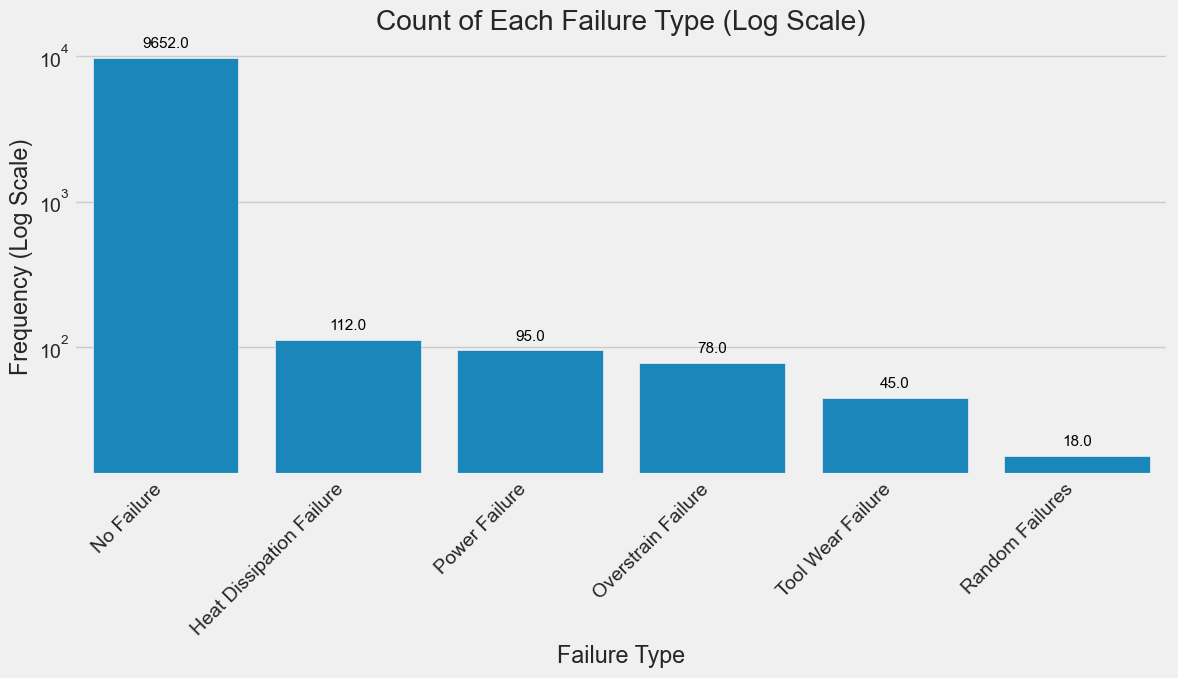

In [5]:
# --- Analyze the binary 'target' column ---
print("Distribution of Binary Failure Target ('target'):")
target_distribution = df_class['target'].value_counts(normalize=True) * 100
print(target_distribution)
print("\n")

# --- Analyze the multi-class 'failure_type' column ---
print("Distribution of Multi-Class Failure Type ('failure_type'):")
failure_type_distribution = df_class['failure_type'].value_counts()
print(failure_type_distribution)
print("\n")

# Plot the failure type distribution for better visualization
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_class, x='failure_type', order=failure_type_distribution.index)
plt.title('Count of Each Failure Type (Log Scale)')
plt.xlabel('Failure Type')
plt.ylabel('Frequency (Log Scale)')
plt.xticks(rotation=45, ha='right')

# --- THIS IS THE KEY ---
# Set the y-axis to a logarithmic scale
ax.set_yscale('log')
# ----------------------

# Add text labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()